<a href="https://colab.research.google.com/github/anhhaibkhn/Machine-Learning-Mastery-Notes/blob/master/StackingEnsembleMachineLearningWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stacking Ensemble Machine Learning With Python
[Source](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

Stacking or stacked generalization is an ensemle ML algorithm.
It uses meta-learning algorithm to learn **how to best combine the predictions from 2 or more base ML algorithms**. The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a `calssifcation` or regression task and make better performance preidcitons than the single ones. 

#### Key points:
* Stacking is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models.
* The scikit-learn library provides a standard implementation of the stacking ensemble in Python.
* How to use stacking ensembles for regression and classification predictive modeling.

#### Overview

1. Stacked Generalizatioin 
2. Stacking Scikit-Learn API
3. Stacking for Classfication
4. Stacking for Regression

### 1. Stacked Generalization

It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

#### Stacking addresses the question:

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

#### Architecture 

#### Level-0 Models (Base-Models): 

* Models fit on the training data and whose predictions are compiled.

* Base-models are often complex and diverse. As such, it is often a good idea to use a range of models that make very different assumptions about how to solve the predictive modeling task, such as linear models, decision trees, support vector machines, neural networks, and more. Other ensemble algorithms may also be used as base-models, such as random forests.

* Base-Models: Use a diverse range of models that make different assumptions about the prediction task.

Level-1 Model (Meta-Model)
* Model that learns how to best combine the predictions of the base models.
* The meta-model is often simple, providing a smooth interpretation of the predictions made by the base models. As such, linear models are often used as the meta-model, such as linear regression for regression tasks (predicting a numeric value) and logistic regression for classification tasks (predicting a class label).
* Examples: Regression Meta-model like Linear Regression, Classfication Meta-model likes Logistic Regression


The most common approach to preparing the training dataset for the meta-model is via [k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/) of the base models, where the [out-of-fold predictions](https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/) are used as the basis for the training dataset for the meta-model.

### 2. Stacking Scikit-Learn API

[Implementing stacking from scratch in Python tutorial.](https://machinelearningmastery.com/implementing-stacking-scratch-python/)

[Implementing stacking from scratch for deep learning in Python tutorial.](https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/)

The scikit-learn Python machine learning library provides an implementation of stacking for machine learning.

It is available in version 0.22 of the library and higher
Stacking is provided via the [StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) and [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) classes.

In [1]:
	# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [8]:
''' Define 2 level-0 models'''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
models = [('lr',LogisticRegression()),('svm',SVC())] 
stacking = StackingClassifier(estimators=models)

In [13]:
'''Each model in the list may also be a Pipeline, 
including any data preparation required by the model prior to fitting the model on the training dataset'''
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [('lr',LogisticRegression()),('svm',make_pipeline(StandardScaler(),SVC()))]
stacking = StackingClassifier(estimators=models)

The dataset for the meta-model is prepared using cross-validation. By default,` 5-fold cross-validation` is used, although this can be changed via the “cv” argument and set to either a number (e.g. 10 for 10-fold cross-validation) or a cross-validation object (e.g. StratifiedKFold)

#### 3. Stacking for Classification

In this section, we will look at using stacking for a classification problem.

First, we can use the [make_classification() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a synthetic binary classification problem with 1,000 examples and 20 input features

In [14]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Evaluating a suite of different machine learning models on the dataset.

Specifically, we will evaluate the following five algorithms:

* Logistic Regression.
* k-Nearest Neighbors.
* Decision Tree.
* Support Vector Machine.
* Naive Bayes.

Each algorithm will be evaluated using default model hyperparameters. The function get_models() below creates the models we wish to evaluate.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.825 (0.046)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


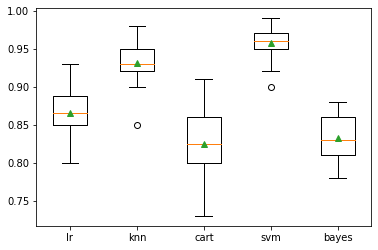

In [16]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

`SVM` performs the best with about `95.7` percent mean accuracy.

A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that KNN and `SVM` perform better on average than LR, CART, and Bayes.

Next, we can try to `combine these five models` into `a single ensemble model using stacking.`

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

The  [get_stacking() function](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) below defines the `StackingClassifier` model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case and if it is not the case, then the base model should be used in favor of the ensemble model.


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.826 (0.039)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.018)


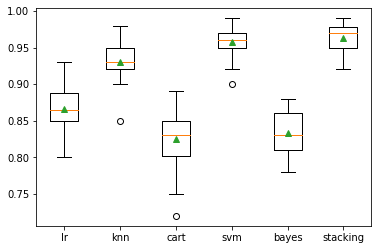

In [17]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the stacking ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset

In [18]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


### 4. Stacking for Regression

In this section, we will look at using stacking for a regression problem.

First, we can use the make_regression() [function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to create a synthetic regression problem with 1,000 examples and 20 input features.

Specifically, we will evaluate the following three algorithms:

* k-Nearest Neighbors.
* Decision Tree.
* Support Vector Regressio

>knn -101.019 (7.161)
>cart -148.460 (11.787)
>svm -162.419 (12.565)


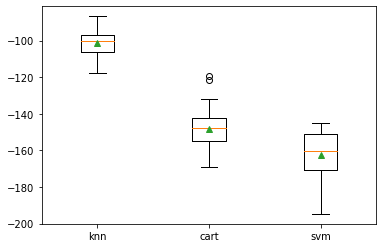

In [19]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

# evaluate a given model using  repeated k-fold cross-validation
def evaluate_model(model):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Here we have three different algorithms that perform well, presumably in different ways on this dataset.

Next, we can try to combine these three models into a single ensemble model using stacking.

We can `use a linear regression model` to learn how to best `combine the predictions` from each of the separate three models.

The get_stacking() `function` below defines the [StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) model by first defining a list of tuples for the three base models, then defining the linear regression meta-model to combine the predictions from the base models using `5-fold cross-validation`.

>knn -101.019 (7.161)
>cart -147.185 (10.837)
>svm -162.419 (12.565)
>stacking -56.696 (5.223)


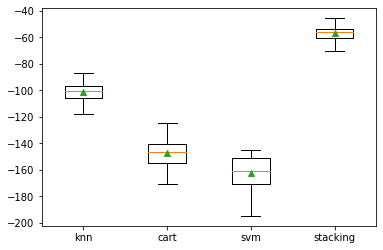

In [20]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the stacking ensemble is fit on all available data, then the `predict() function` can be called to make predictions on new data.

The example below demonstrates this on our regression dataset

In [21]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 556.980


#### Further Reading

* How to Implement Stacked Generalization (Stacking) From Scratch With Python [link](https://machinelearningmastery.com/implementing-stacking-scratch-python/)
* How to Develop a Stacking Ensemble for Deep Learning Neural Networks in Python With Keras [link](https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/)
* How to Develop Super Learner Ensembles in Python [link](https://machinelearningmastery.com/super-learner-ensemble-in-python/)
* How to Use Out-of-Fold Predictions in Machine Learning [link](https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/)
* A Gentle Introduction to k-fold Cross-Validation [link](https://machinelearningmastery.com/k-fold-cross-validation/)